<a href="https://colab.research.google.com/github/vanikanoria/DeepLearning_Fall2021/blob/main/AIT_Deep_learning_Assigment_1_VaniKanoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2020 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# Boston housing prices - modeling
In this notebook we will: 
* using Boston housing data (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Assigment: 
* please complete TODO parts


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import load_boston

In [2]:
# Keras imports : model, layers, optimizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam

In [3]:
# load Boston Housing dataset
X, Y = load_boston(return_X_y=True)
nb_samples = X.shape[0]
print(nb_samples)

506


In [4]:
print(X.shape, Y.shape)

(506, 13) (506,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


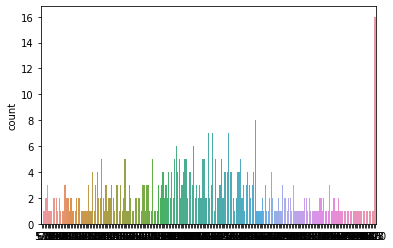

In [5]:
import seaborn as sns
sns.countplot(Y)

Splitting data into training, validation and test sets:

In [36]:
valid_split = 0.2
test_split  = 0.1

v_point = int(nb_samples*(1-valid_split-test_split))
t_point = int(nb_samples*(1-test_split))

X_train = X[0:v_point]
Y_train = Y[0:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

In [37]:
print(X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape, X_test.shape, Y_test.shape)

(354, 13) (354,) (101, 13) (101,) (51, 13) (51,)


Standardization of the data:

In [38]:
scaler  = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

Defining the model (with one or two hidden layers and 8-64 neurons / layer, the input and output layers' sizes are defined by the data):

In [39]:
model = Sequential()
# X_train.shape[1] inputs, hidden layers with 64 neurons, 1 output
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='sigmoid')) #input and hidden layer with 64 neurons
model.add(Dense(64, activation='sigmoid')) #hidden layer with 64 neurons
model.add(Dense(1, activation='linear'))#output layer


Inspect the model summary:

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: 5121

Compiling the model:

In [49]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1), # 0.001
              metrics=['accuracy'])

Defining the earlystopping callback function:

In [50]:
es = EarlyStopping(monitor='val_loss', 
                   patience=20, verbose=1,
                   restore_best_weights=True)

Train the model, use training and validation data and apply early stopping:

In [51]:
model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), callbacks=[es], epochs=100000000)

Epoch 1/100000000
12/12 [==============================] - 1s 16ms/step - loss: 81.6494 - accuracy: 0.0000e+00 - val_loss: 110.0585 - val_accuracy: 0.0000e+00
Epoch 2/100000000
12/12 [==============================] - 0s 3ms/step - loss: 51.4687 - accuracy: 0.0000e+00 - val_loss: 112.7383 - val_accuracy: 0.0000e+00
Epoch 3/100000000
12/12 [==============================] - 0s 3ms/step - loss: 41.0570 - accuracy: 0.0000e+00 - val_loss: 125.1717 - val_accuracy: 0.0000e+00
Epoch 4/100000000
12/12 [==============================] - 0s 3ms/step - loss: 35.0428 - accuracy: 0.0000e+00 - val_loss: 117.9205 - val_accuracy: 0.0000e+00
Epoch 5/100000000
12/12 [==============================] - 0s 3ms/step - loss: 27.6197 - accuracy: 0.0000e+00 - val_loss: 205.1119 - val_accuracy: 0.0000e+00
Epoch 6/100000000
12/12 [==============================] - 0s 3ms/step - loss: 21.0211 - accuracy: 0.0000e+00 - val_loss: 241.9244 - val_accuracy: 0.0000e+00
Epoch 7/100000000
12/12 [==========================

Evaluate on the test data:

In [52]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 17.1629 - accuracy: 0.0000e+00


[17.16291046142578, 0.0]

Make predictions:

In [53]:
preds = model.predict(X_test)

Inspecting the result on a regression plot:

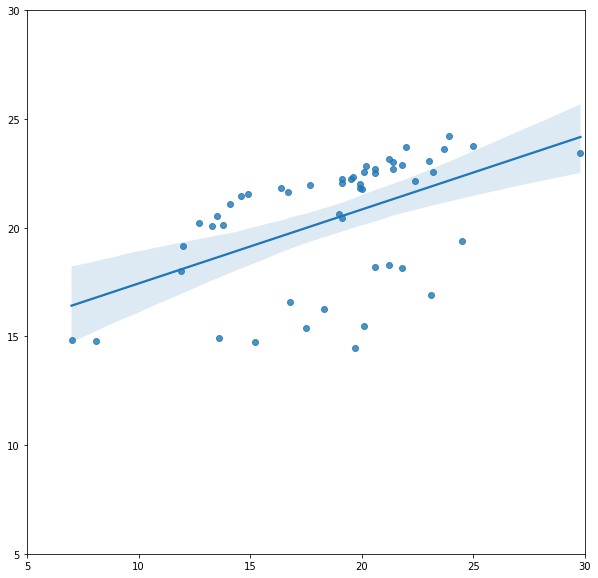

In [54]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(5,30),ylim=(5,30)); 